In [2]:
from __future__ import print_function

import speech_recognition as src
# filename = "2.wav"
#
# initialize the recognizer
r = src.Recognizer()
#
# # open the file
# with sr.AudioFile(filename) as source:
#     # listen for the data (load audio to memory)
#     audio_data = r.record(source)
#     # recognize (convert from speech to text)
#     text = r.recognize_google(audio_data)
#     print(text)
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

import numpy as np
import matplotlib.pyplot as plt
import librosa

import librosa.display

import sox
import os

d:\proj\py_proj\p_croller\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
import soundfile as sf
rate = 44100
import numpy as np

In [42]:
len(S_full[:,2])

1025

In [33]:
S_full.shape

(1025, 18)

In [35]:
sox.file_info.sample_rate('recordings/0_jackson_5.wav')

8000.0

In [37]:
1025/8000

0.128125

recordings/0_jackson_5.wav
recordings/0_nicolas_5.wav
recordings/0_theo_5.wav


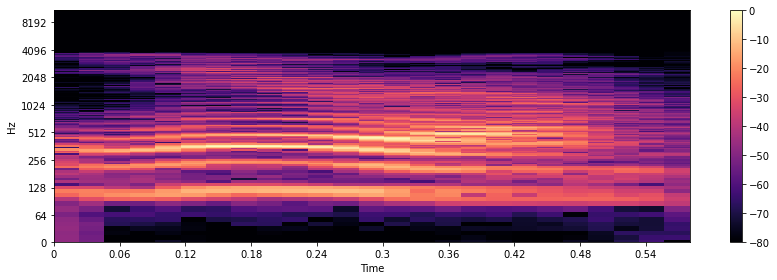

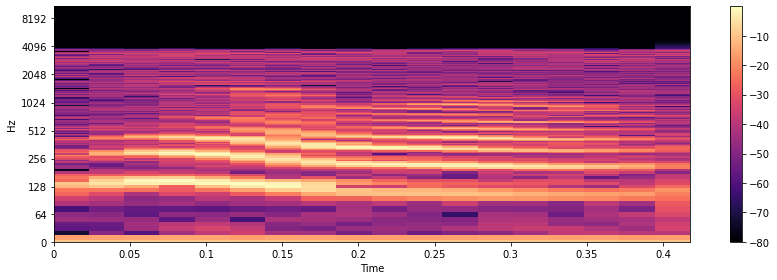

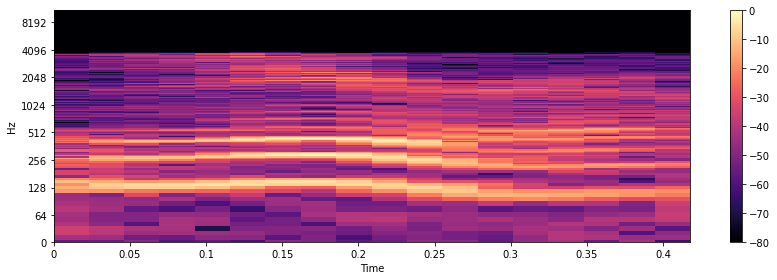

In [31]:
speakers = ["jackson", "nicolas", "theo"]
target = 0
cnts = 5
fix_path = 'recordings/'
fmt = '.wav'

for speaker in speakers:
    file_name = fix_path + str(target) + "_" + speaker + "_" + str(cnts) + fmt
    print(file_name)
    y, sr = librosa.load(file_name, duration=5)

    # And compute the spectrogram magnitude and phase
    S_full, phase = librosa.magphase(librosa.stft(y))
    # Plot a 5-second slice of the spectrum
    idx = slice(*librosa.time_to_frames([0, 50], sr=sr))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                             y_axis='log', x_axis='time', sr=sr)
    plt.colorbar()
    plt.tight_layout()

['0_jackson_0.wav', '0_jackson_1.wav', '0_jackson_10.wav', '0_jackson_11.wav', '0_jackson_12.wav', '0_jackson_13.wav', '0_jackson_14.wav', '0_jackson_15.wav', '0_jackson_16.wav', '0_jackson_17.wav']
0_jackson_0.wav
0_jackson_1.wav
0_jackson_10.wav
0_jackson_11.wav
0_jackson_12.wav
0_jackson_13.wav
0_jackson_14.wav
0_jackson_15.wav
0_jackson_16.wav
0_jackson_17.wav
0_jackson_18.wav


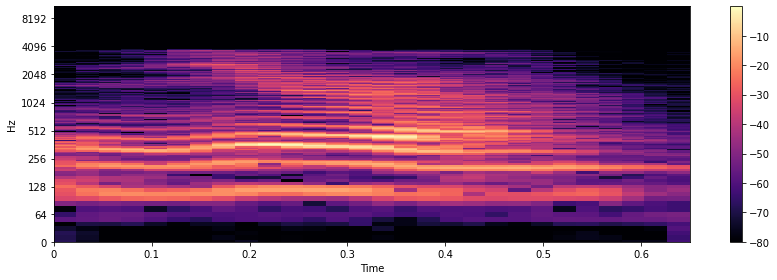

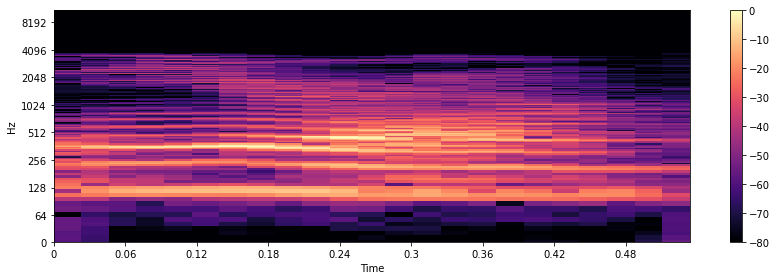

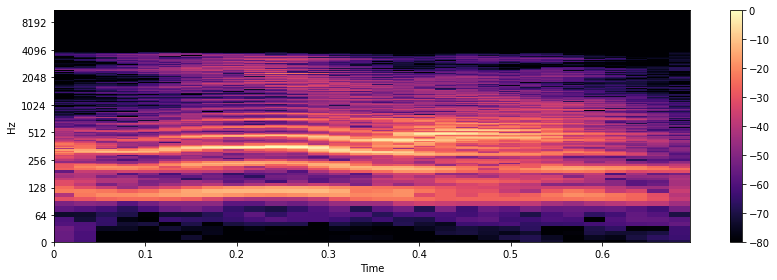

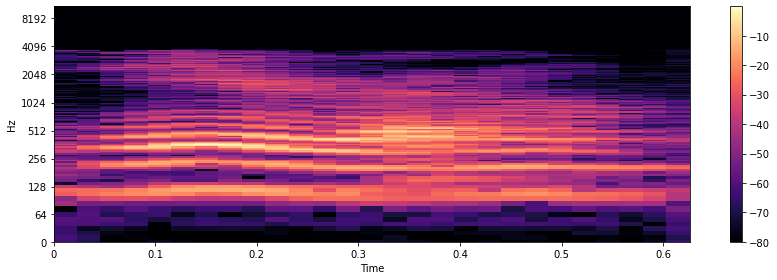

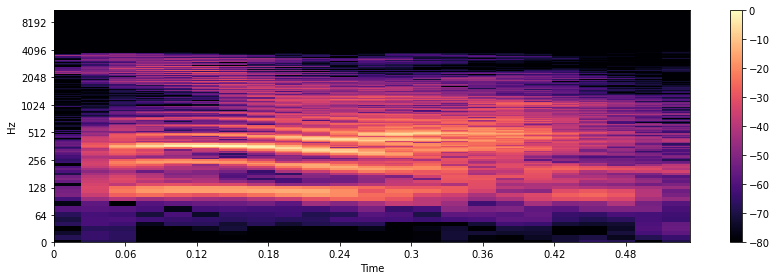

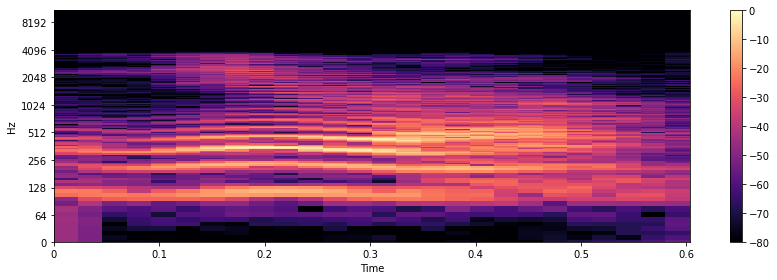

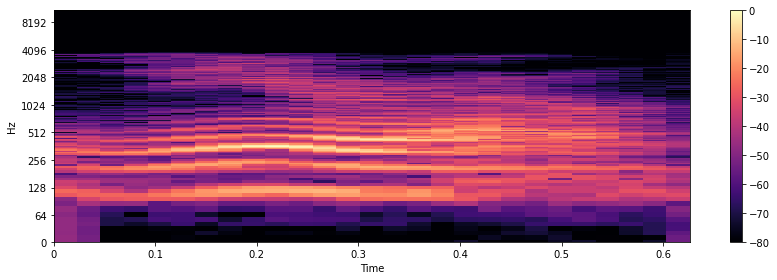

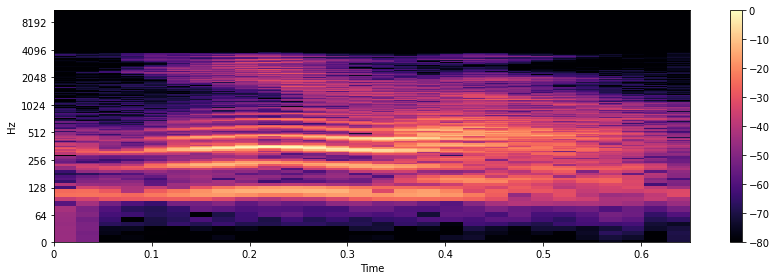

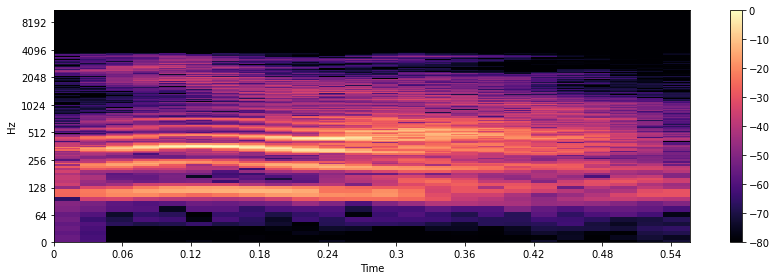

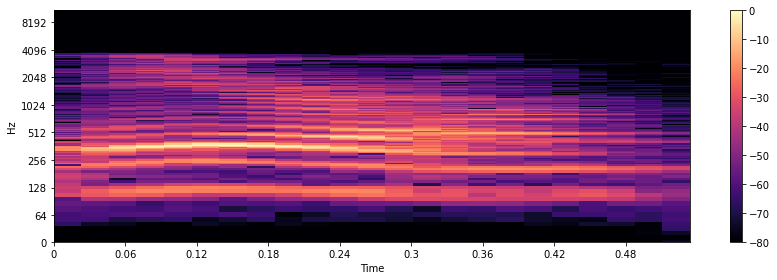

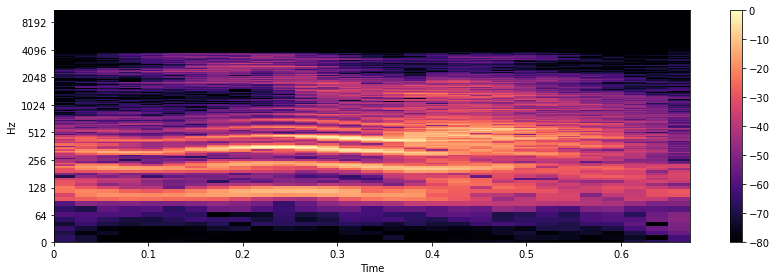

In [27]:
fix_path = 'recordings/'
lists = os.listdir(fix_path)
lists.sort()
print(lists[:10])
for cnt, item in enumerate(lists):
    print(item)
    file_name = fix_path + item
    # Load an example with vocals.
    y, sr = librosa.load(file_name, duration=5)

    # And compute the spectrogram magnitude and phase
    S_full, phase = librosa.magphase(librosa.stft(y))
    # Plot a 5-second slice of the spectrum
    idx = slice(*librosa.time_to_frames([0, 50], sr=sr))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                             y_axis='log', x_axis='time', sr=sr)
    plt.colorbar()
    plt.tight_layout()
    if cnt >= 10:
        break

In [4]:
file_processed = "2.wav"
#file_target = "on_my_own.wav"
file_target = "newsroom.wav"

In [5]:
sox.file_info.sample_rate(file_target)

44100.0

In [6]:
# Load an example with vocals.
y, sr = librosa.load(file_target, duration=240)

# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))

In [9]:
sr

22050

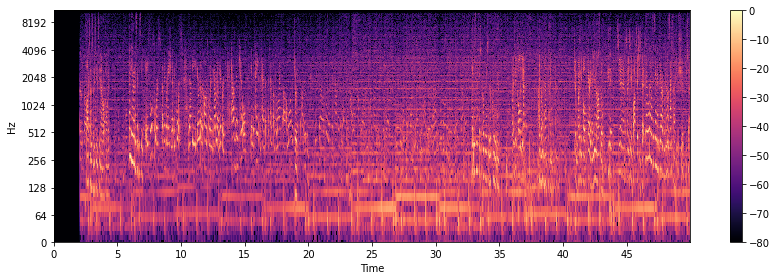

In [18]:
# Plot a 5-second slice of the spectrum
idx = slice(*librosa.time_to_frames([0, 50], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [9]:
# We'll compare frames using cosine similarity, and aggregate similar frames
# by taking their (per-frequency) median value.
#
# To avoid being biased by local continuity, we constrain similar frames to be
# separated by at least 2 seconds.
#
# This suppresses sparse/non-repetetitive deviations from the average spectrum,
# and works well to discard vocal elements.

S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

# The output of the filter shouldn't be greater than the input
# if we assume signals are additive.  Taking the pointwise minimium
# with the input spectrum forces this.
S_filter = np.minimum(S_full, S_filter)
# We can also use a margin to reduce bleed between the vocals and instrumentation masks.
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full

In [10]:
D_foreground = S_foreground * phase

In [11]:
y_foreground = librosa.istft(D_foreground)

In [13]:
sf.write('newsroom_mod.wav', y_foreground, 22050)

In [ ]:
from pydub.silence import split_on_silence

In [37]:
sound = AudioSegment.from_wav("newsroom_mod.wav")

In [28]:
chunks = split_on_silence(sound, 200, sound.dBFS-14, 200,)
len(chunks)

1

In [29]:
chunks = split_on_silence(sound, 200, sound.dBFS-20, 200,)
len(chunks)

1

In [33]:
chunks = split_on_silence(sound, 200, sound.dBFS-8, 200,)
len(chunks) #with instrument

19

In [40]:
chunks = split_on_silence(sound, 500, sound.dBFS, 500,)
len(chunks) #without instrument

22

In [41]:
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS,#-14,#-30,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    print(len(chunks))
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with src.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except src.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

In [42]:
get_large_audio_transcription("newsroom_mod.wav")

22
Error: 
Error: 
Error: 
Error: 
audio-chunks\chunk5.wav : I don't have. 
Error: 
Error: 
Error: 
Error: 
Error: 
Error: 
audio-chunks\chunk12.wav : Lionel interview. 
Error: 
Error: 
Error: 
Error: 
Error: 
Error: 
Error: 
Error: 
Error: 
audio-chunks\chunk22.wav : What we know so far. 


"I don't have. Lionel interview. What we know so far. "

In [35]:
get_large_audio_transcription("newsroom.wav")

19
Error: 
audio-chunks\chunk2.wav : Fox msnbc and cnn royal colony. 
audio-chunks\chunk3.wav : Let me hear msnbc. 
audio-chunks\chunk4.wav : A sole source. 
audio-chunks\chunk5.wav : Of information that report. 
audio-chunks\chunk6.wav : That the arizona congresswoman gabrielle giffords. 
audio-chunks\chunk7.wav : Has been killed. 
audio-chunks\chunk8.wav : When does heinous a10. 
audio-chunks\chunk9.wav : Attempt on her life. 
audio-chunks\chunk10.wav : Along with joey. 
audio-chunks\chunk11.wav : Autozone. 
Error: 
Error: 
Error: 
Error: 
audio-chunks\chunk16.wav : Msnbc fox and cnn also she said downtown. 
Error: 
audio-chunks\chunk18.wav : . it's a person. 
audio-chunks\chunk19.wav : A doctor pronounces are dead not the news. 


"Fox msnbc and cnn royal colony. Let me hear msnbc. A sole source. Of information that report. That the arizona congresswoman gabrielle giffords. Has been killed. When does heinous a10. Attempt on her life. Along with joey. Autozone. Msnbc fox and cnn also she said downtown. . it's a person. A doctor pronounces are dead not the news. "